# グラフなどの可視化

## モジュールmatplotlib 

困ったら公式ページ[Matplotlib API Overview](https://matplotlib.org/3.1.1/api/index.html) を見るのが一番である。

本来ならmatplotlibの基本的な使用法を解説するべきではあるが，ここではpandasから直接描画する方法に着目して述べる．

例題として用いるのはiris（アヤメ）のデータである．

まずはpandasを用いてデータを読んでおく．


```python
%matplotlib inline
```
としておくと，描画が画面にすぐに表示されるようになる．


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

df = pd.read_csv('http://logopt.com/data/iris.data', names=['sepal length','sepal width','petal length','petal width', 'class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## ヒストグラム

まずはヒストグラム（histgram, 度数分布表）を描画してみる．

ヒストグラムは数値データの分布の概要を知る際に便利である．

pandasのデータフレームの**hist**メソッドを用いる．

引数**bins**でビンの数（x軸の区分数）を指定できる．（色々変えて試してみよう．規定値は $10$ である．）

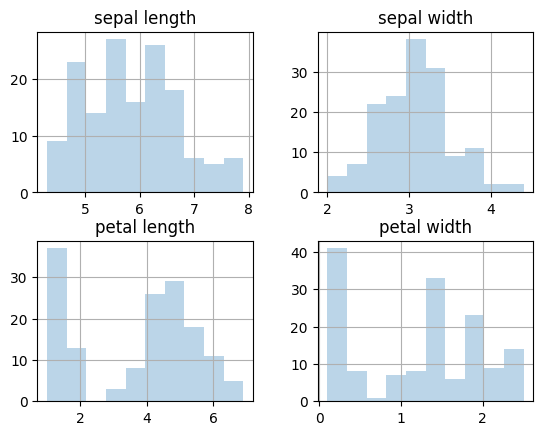

In [11]:
df.hist(alpha=0.3, bins=10);

### 問題

http://logopt.com/data/SATGPA.csv データを読み込み，2種類のSATの成績とGPAのヒストグラムを描画せよ．
また，引数のalphaとbinsを色々変えてみよ．

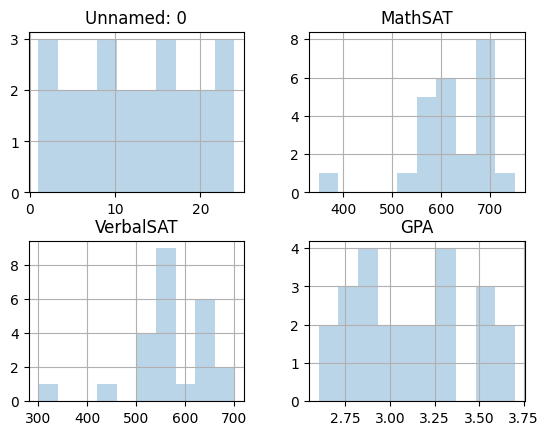

In [13]:
df = pd.read_csv('http://logopt.com/data/SATGPA.csv')
df.head()

df.hist(alpha=0.3, bins=10);

### 問題

以下のように読み込んだポケモンのデータフレームを用いて，攻撃力(Attack)，守備力（Defense)のヒストグラムを描画せよ．
（ヒント：データフレームから一部の列を切り出す方法については，pandasの練習問題を参考にせよ．）

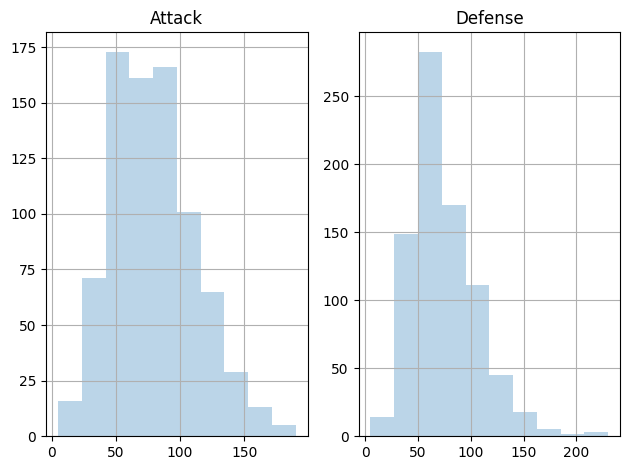

In [24]:
pokemon = pd.read_csv("http://logopt.com/data/poke.csv",encoding="utf-8",index_col=0)
pokemon.head()

fig, ax = plt.subplots(1, 2)
pokemon.Attack.hist(alpha=0.3, bins=10 , ax=ax[0])
ax[0].set_title('Attack')

pokemon.Defense.hist(alpha=0.3, bins=10 , ax=ax[1])
ax[1].set_title('Defense')

plt.tight_layout()
plt.show()

## 散布図

散布図（scatter plot)は，2つの数値データの関係を知る際に便利である．

pandasのデータフレームの**plot.scatter**メソッドを用いる．

引数の**x**と**y**で $x,y$ 軸に使用するデータ（データフレームの列名）を指定する．

ここでは'がく片長 'sepal length'と花びら長 'petal length'の関係を図示してみる．

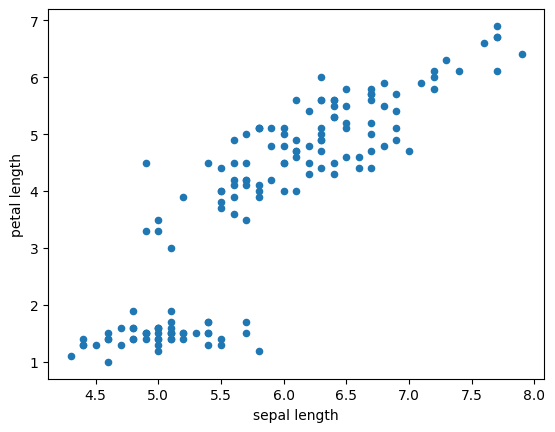

In [27]:
df.plot.scatter(x='sepal length', y= 'petal length');

### 問題
http://logopt.com/data/Diamond.csv からダイアモンドの価格データを読み込み，カラット"carat"と価格 "price" の散布図を描け．

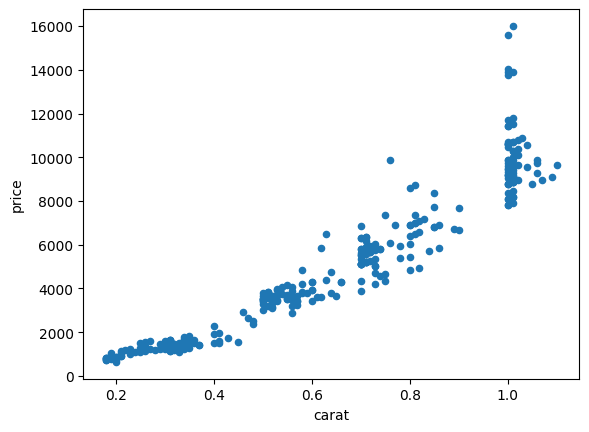

In [29]:
dye= pd.read_csv("http://logopt.com/data/Diamond.csv",encoding="utf-8",index_col=0)

dye.plot.scatter(x='carat', y= 'price');

## 問題

ポケモンのデータフレームに対して，攻撃力(Attack)，守備力（Defense)の関係を散布図に描画せよ．

（ヒント：データフレームから一部の列を切り出す方法については，pandasの練習問題を参考にせよ．）

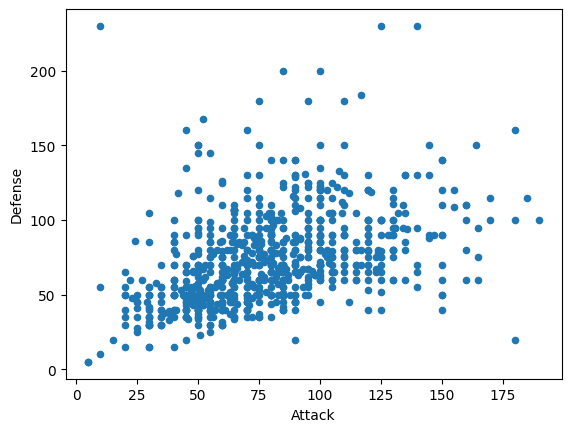

In [30]:
pokemon.plot.scatter(x='Attack', y= 'Defense');

## 他の図

pandasのデータフレームの**plot**の中には他にも様々な描画メソッドが含まれている．

色々試してみよう．

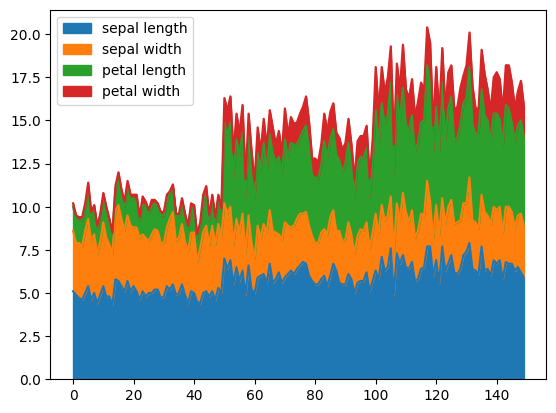

In [31]:
df.plot.area(); #m面積図

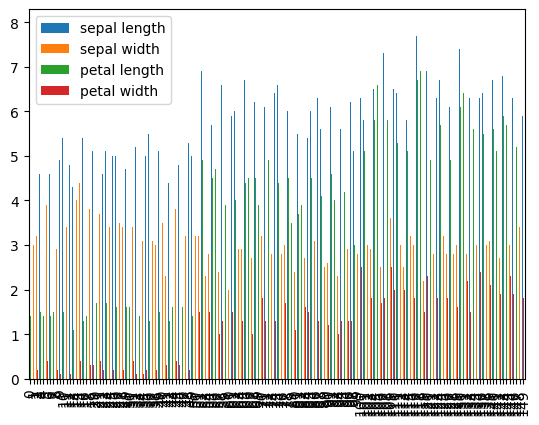

In [32]:
df.plot.bar(); #棒グラフ

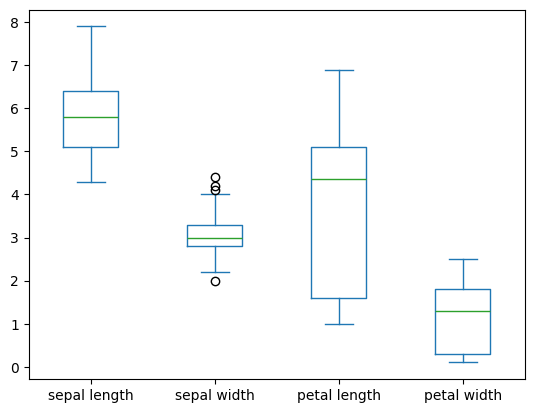

In [33]:
df.plot.box();#箱ひげ図

In [37]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 30.3 MB 7.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


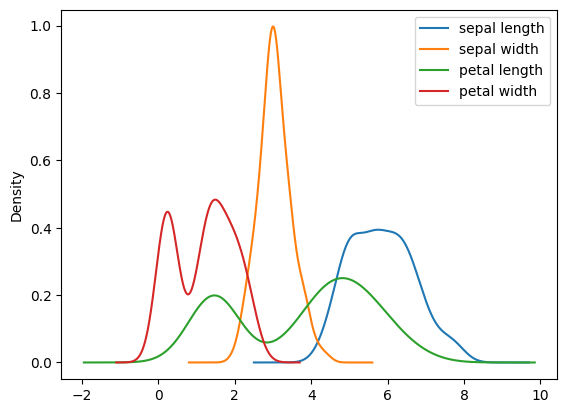

In [38]:
df.plot.density();#カーネル密度推定（kdeと同じ）

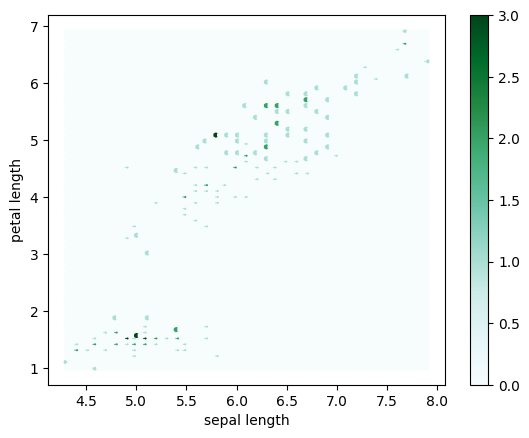

In [39]:
df.plot.hexbin(x='sepal length', y= 'petal length'); #6角形格子図（散布図と同様に，x,y軸を入れる．）

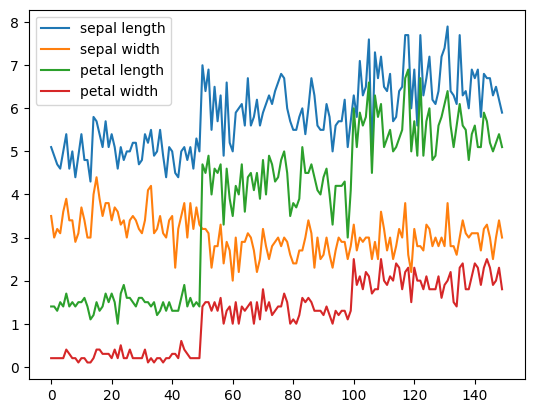

In [40]:
df.plot.line();#線グラフ df.plot()でも同じ

## 問題

ポケモンのデータを自分なりに可視化せよ．その際，どの列に対して，どの図を選択すれば良いか考え，考察とともにレポートせよ．

In [49]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [51]:
import numpy as np
pokemon.head()


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Japanese
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,フシギダネ
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,フシギソウ
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,フシギバナ
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,フシギバナ・メガ進化
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,ヒトカゲ


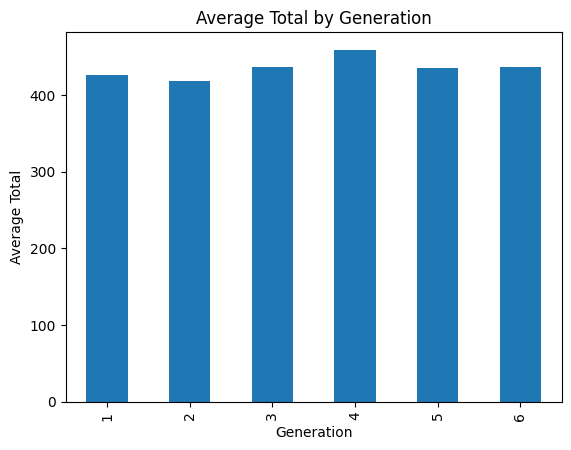

In [52]:
import matplotlib.pyplot as plt

# 'Generation'列を横軸に、'Total'列の平均を縦軸にした棒グラフを作成します。
pokemon.groupby('Generation')['Total'].mean().plot(kind='bar')

plt.xlabel('Generation')
plt.ylabel('Average Total')
plt.title('Average Total by Generation')

plt.show()

## 多次元データ 1 並行座標図

散布図では3次元までの図を可視化できるが，4次元以上だと人間の目では無理だ．

多次元データを可視化するための方法として**並行座標図**がある．

これは散布図の $y$ 軸を $x$ 軸と並行にしたものである．複数の $y$ 軸があっても大丈夫だが，あまり多いとよく分からなくなる．

pandasでは**plotting**（古いバージョンだと**tools.plotting**）にある**parallel_coordinates** 関数を用いて並行座標図を描画できる．

第1引数はデータフレームであり，第2引数は分けて描画したいクラスを表す列名を与える．

並行座標図は，比例関係は平行な直線で，反比例関係は1つの点で交わる直線群で描画する．

例として，$x= 0,1,2, \ldots,9$，$y=2x$, $z=10-x$ を描画してみよう．

In [53]:
from pandas.plotting import parallel_coordinates

In [54]:
data = []   # x,y,zを入れたリストを作成
for i in range(10):                    
    row = [ i, 2*i, 10-i, 'dummy' ] #クラス名を指定するためにダミーの列を最後に追加
    data.append( row )
testdf = pd.DataFrame(data)
testdf.head()

,0,1,2,3
0,0,0,10,dummy
1,1,2,9,dummy
2,2,4,8,dummy
3,3,6,7,dummy
4,4,8,6,dummy


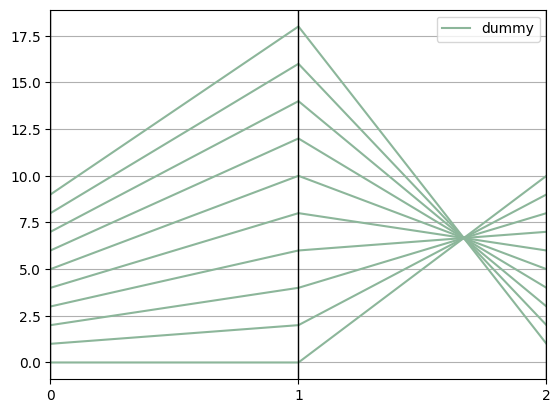

In [55]:
parallel_coordinates(testdf,3); #ダミーの列の名前は 3 

## 問題

1. iris（アヤメ）のデータフレームをアヤメの種類 'class' ごとに並行座標図に描画せよ．

2. ポケモンデータを並行座標図で描画せよ．
ただし，伝説ポケモンか否か（Legendary)でクラス分けを行い，軸としては体力(HP)，攻撃力(Attack)，守備力(Defense)を用いよ．


/var/folders/09/9hrzy57n5rb428pvqftbcxwr0000gn/T/ipykernel_6929/2466182288.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Legendary'] = data['Legendary'].astype(str)


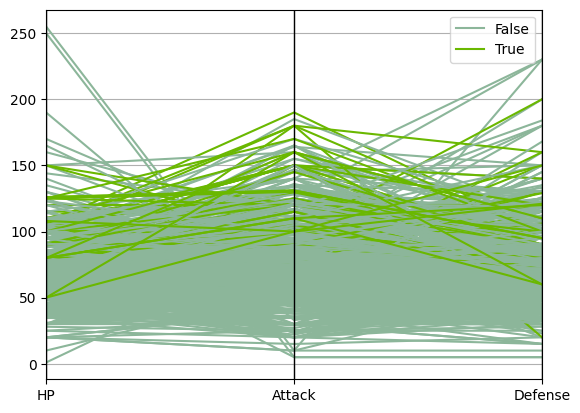

In [62]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# 必要な列だけを抽出します。
data = pokemon[['HP', 'Attack', 'Defense', 'Legendary']]

# 'Legendary'列の値を文字列に変換します。
data['Legendary'] = data['Legendary'].astype(str)

# 並行座標図を作成します。
parallel_coordinates(data, 'Legendary')

plt.show()

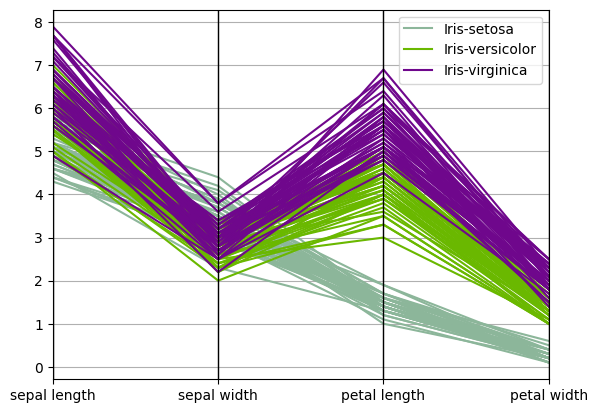

In [56]:
parallel_coordinates(df,'class'); #クラス名を指定する

## 多次元データ 2

多次元データを可視化するためのもう1つの方法として**Andrew曲線**がある．

これは．多次元データ $x_1,x_2,\ldots$ をフーリエ曲線

$$
f_x(t) = \frac{x_1}{\sqrt 2} + x_2 \sin(t) + x_3 \cos(t) + x_4 \sin(2t) + x_5 \cos(2t) + \cdots
$$

で変換し，$-\pi < t < \pi$ の間に描画したものである．

pandasでは**plotting**（古いバージョンだと**tools.plotting**）にある**andrews_curves** 関数を用いて並行座標図を描画できる．

第1引数はデータフレームであり，第2引数は分けて描画したいクラスを表す列名を与える．

例として，$x= 0,1,2, \ldots,9$，$y=2x$, $z=10-x$ を描画してみよう．

In [63]:
from pandas.plotting import andrews_curves

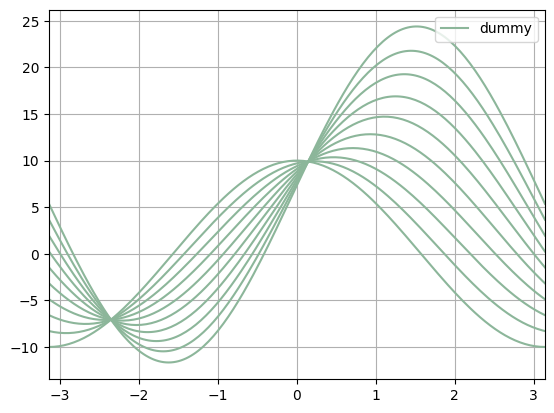

In [64]:
andrews_curves(testdf, 3);

## 問題

1. アヤメ(iris)データをアヤメの種類 'class' ごとにAndrew曲線で描画せよ．

2. ポケモンデータをAndrew曲線で描画せよ．
ただし，伝説ポケモンか否か（Legendary)でクラス分けを行い，軸としては体力(HP)，攻撃力(Attack)，守備力(Defense)を用いよ．

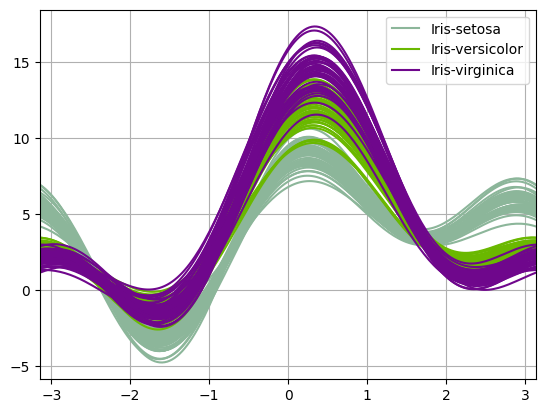

In [65]:
andrews_curves(df,'class'); #クラス名を指定する

/var/folders/09/9hrzy57n5rb428pvqftbcxwr0000gn/T/ipykernel_6929/2727601377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Legendary'] = data['Legendary'].astype(str)


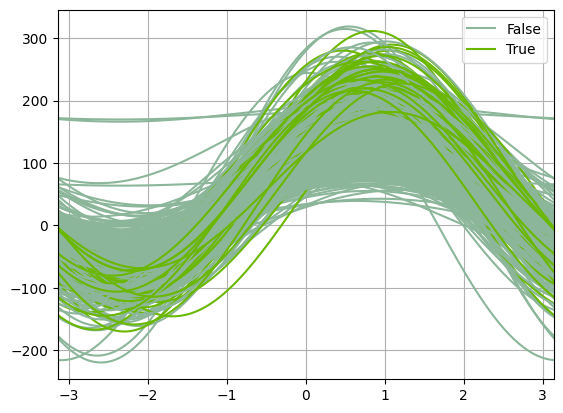

In [66]:
data = pokemon[['HP', 'Attack', 'Defense', 'Legendary']]

# 'Legendary'列の値を文字列に変換します。
data['Legendary'] = data['Legendary'].astype(str)

andrews_curves(data, 'Legendary')

plt.show()

## データ解析用描画モジュール seaborn 

seabornを用いることによって，さらに簡単にデータ解析ができ，描画も綺麗になる．

まずはseabornモジュールを**sns**という別名で読み込んでおく．


In [68]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 8.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [69]:
import seaborn as sns
%matplotlib inline

## ヒストグラム

seabornでヒストグラム（histgram, 度数分布表）に対応するものは**displot**（distribution plot）だ．

例としてiris（アヤメ）のデータの「がく片長」('sepal length')を描画してみる．

引数としては，以下のものがあるので，色々試してみよう．

* bins: ビンの数
* kde: カーネル密度推定の有無
* rug: データの位置(敷物:rug)の有無

In [71]:
df = pd.read_csv('http://logopt.com/data/iris.data', names=['sepal length','sepal width','petal length','petal width', 'class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/var/folders/09/9hrzy57n5rb428pvqftbcxwr0000gn/T/ipykernel_6929/841875766.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal length'], bins=20, rug=True, kde =True);


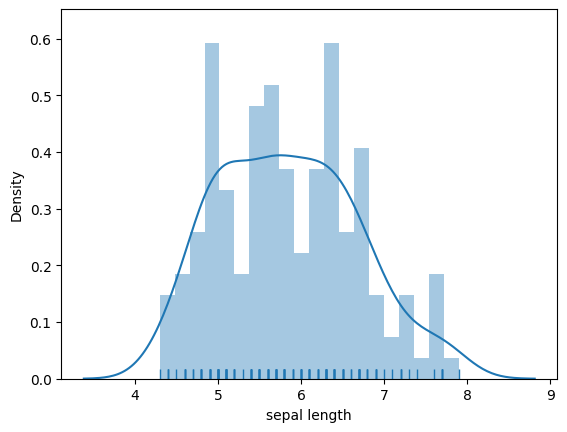

In [72]:
sns.distplot(df['sepal length'], bins=20, rug=True, kde =True);

### 問題

http://logopt.com/data/SATGPA.csv データを読み込み，GPAの分布をdistplotを用いて描画せよ．

/var/folders/09/9hrzy57n5rb428pvqftbcxwr0000gn/T/ipykernel_6929/299093165.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sat['GPA'], bins=20, rug=True, kde =True);


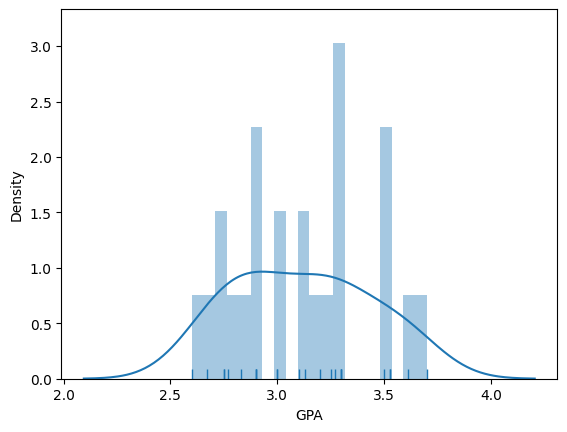

In [77]:
sat= pd.read_csv('http://logopt.com/data/SATGPA.csv')
sat.head()
sns.distplot(sat['GPA'], bins=20, rug=True, kde =True);

## 散布図

seabornで散布図に対応するものは**jointplot**だ．おまけとして分布も表示される．

引数としては，$x,y$ と $data$ の他に種類を表す**kind**がある．

kindは以下のものがとれるので，色々試してみよう．

*  "scatter"：普通の散布図
* "reg" : 回帰分析
* "resid" : 回帰の残差
* "kde" : カーネル密度推定
* "hex" : 6角形格子 

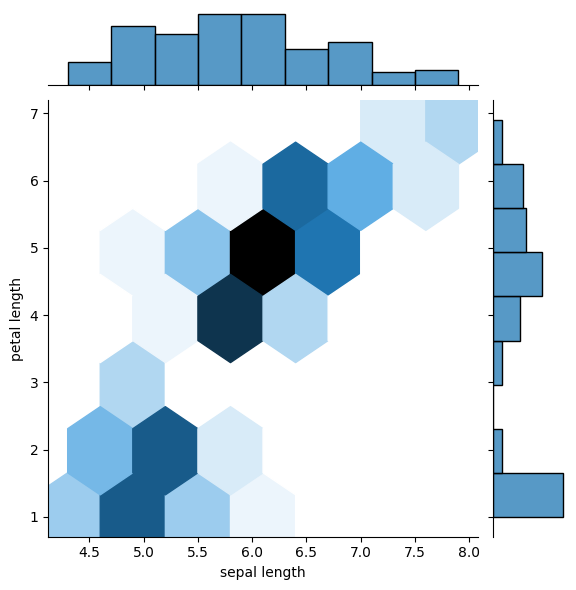

In [80]:
sns.jointplot( x='sepal length', y='petal length', data=df,  kind='hex');

データフレームに含まれる複数の列間の散布図を一度に描画するには**pairplot**を用いる．

引数として**hue**（色調）をとることができ，色を変えたい列名（以下の例ではアヤメの種類('class'）を指定して描画している．


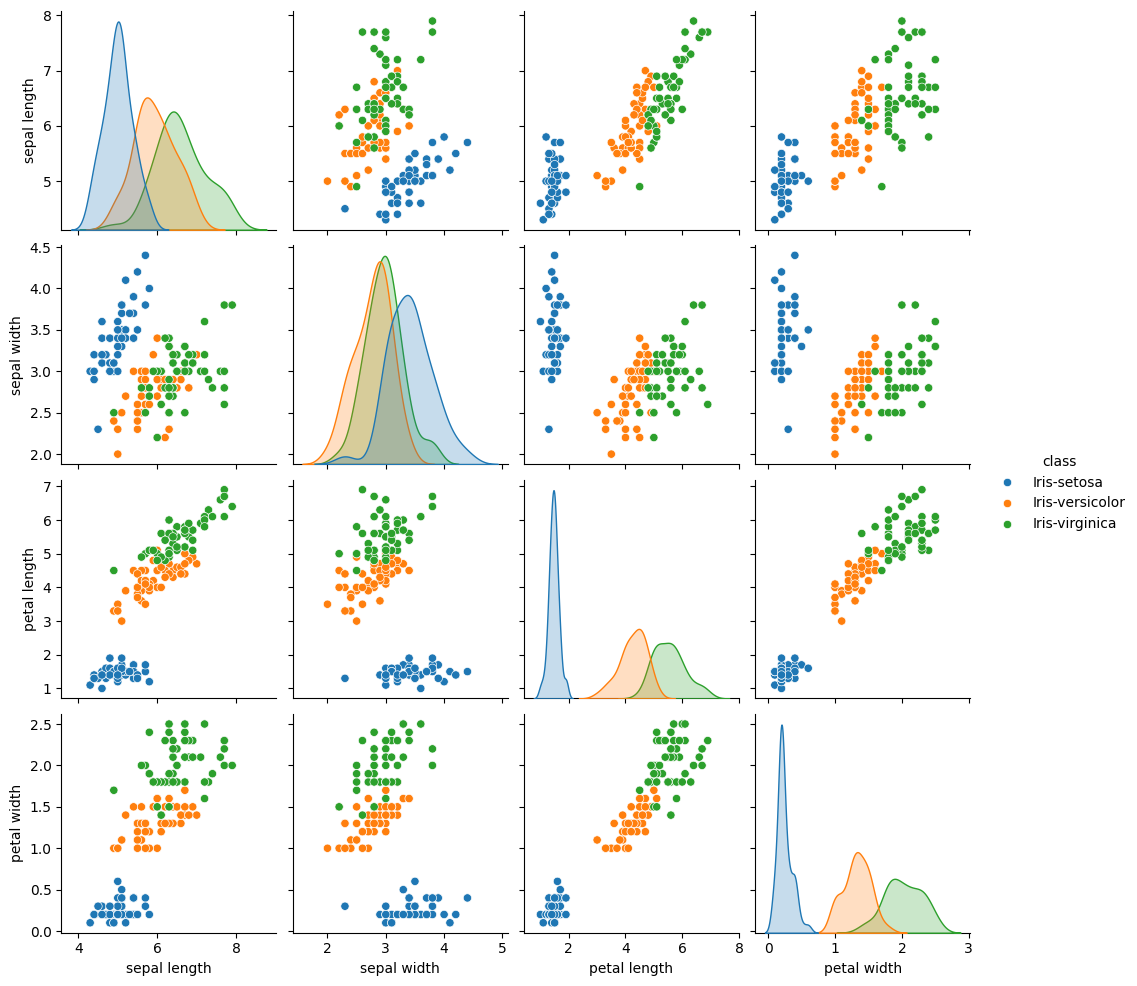

In [81]:
sns.pairplot(df, hue='class');

### 問題
1. http://logopt.com/data/SATGPA.csv データを読み込み，MathSATとGPAの関係をjointplotを用いて描画せよ．
2. http://logopt.com/data/SATGPA.csv データを読み込み，MathSAT, VerbalSAT, GPAの相互関係をpairplotを用いて描画せよ．

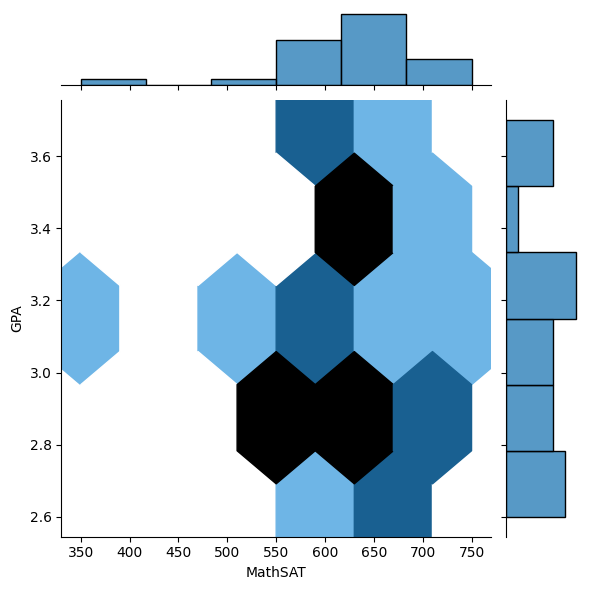

In [82]:
sns.jointplot( x='MathSAT', y='GPA', data=sat,  kind='hex');

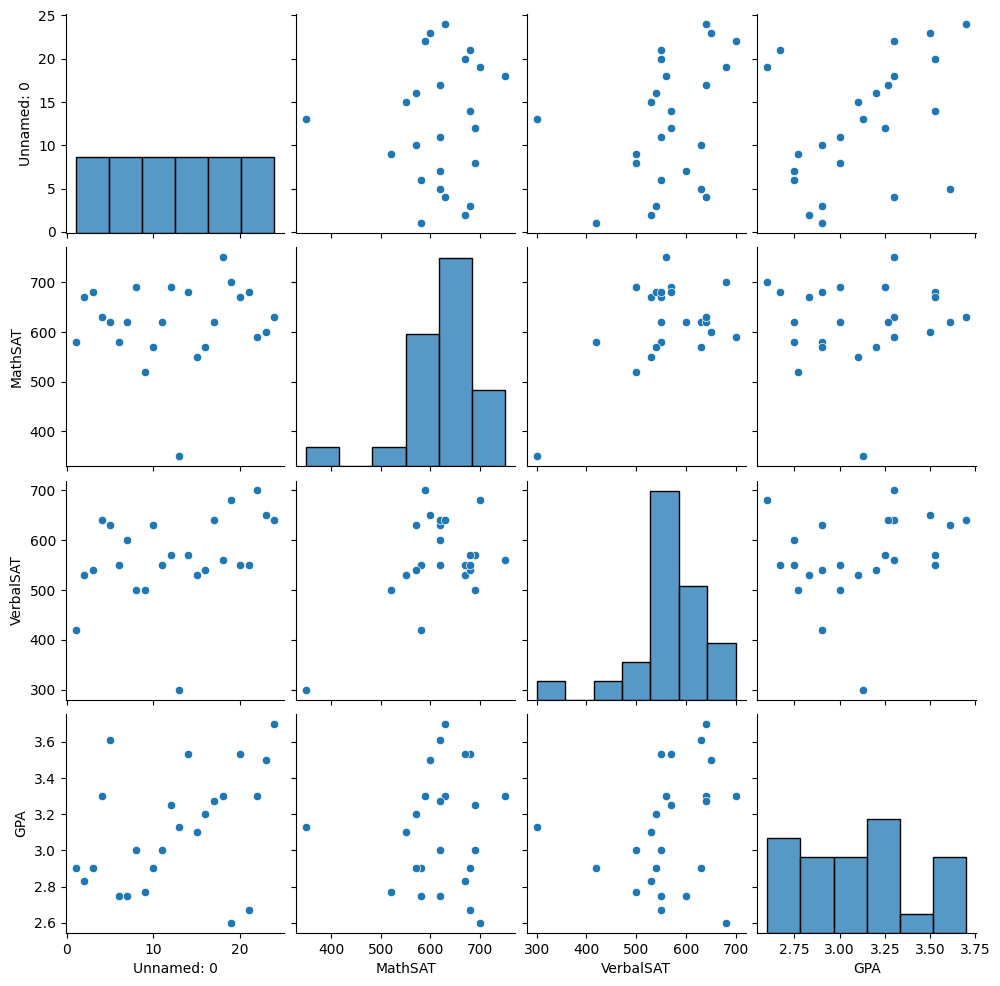

In [83]:
sns.pairplot(sat);

## 回帰プロット

seabornでは統計モジュール**statsmodels**を用いた回帰分析の結果を描画することができる．

カテゴリーデータ別の回帰を行いたい場合には，FacetGrid）を用いるのだが，**lmplot**は回帰の結果をFacetGridで表示してくる優れものである．

例としてseabornに例題として含まれているtipsデータを用いる．

FacetGridでは行(row)と列(col)を表すカテゴリーデータを引数で指定できる他に，色調(hue)も用いることができる．

以下の例では，tipsデータに対して支払総額（'total_bill'）とチップ（'tip'）の関係を，
行に喫煙者か否か（row='smoker'），列に性別（col='sex'），色調に昼食か夕食か（hue='time')を設定して分析する．


In [84]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


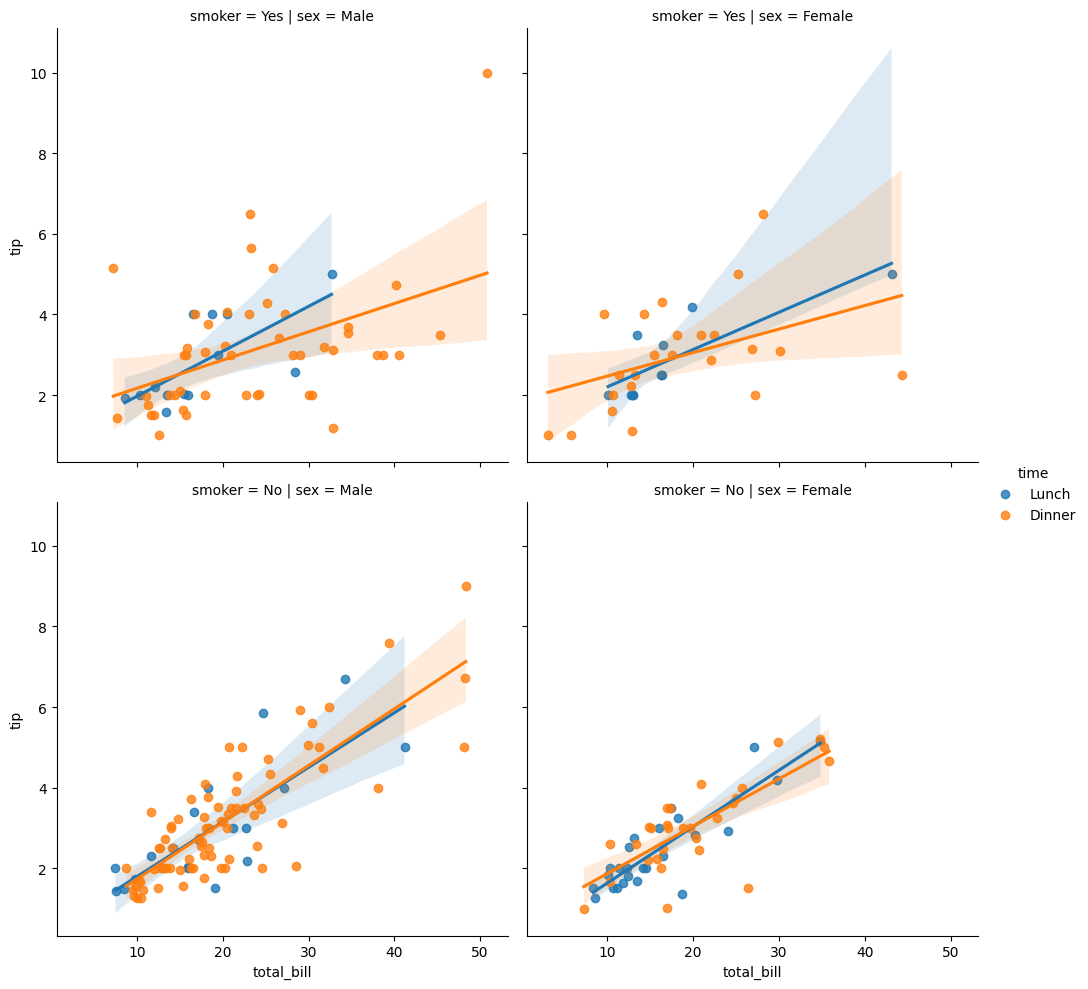

In [85]:
sns.lmplot(x='total_bill', y='tip', data=tips, row='smoker', col='sex', hue='time');

## カテゴリーデータの分析

カテゴリーデータ別に集計したい場合には，**factorplot**を用いると便利だ．

引数は以下の通り．

* x: x軸
* y: y軸
* data: データフレーム
* row: 行名
* col: 列名
* hue: 色調
* kind: グラフの種類 (point, bar, count, box, violin, strip)
* split: バイオリン図(violin：箱ひげ図の拡張)の場合だけ有効で，Trueのとき左右に色調を分けて描画する．

以下の例では，tipsデータに対し，日ごと(x)のチップ（y)を喫煙者か否か（row='smoker'），性別（col='sex'），
昼食か夕食か（hue='time'）ごとにバイオリン図で描画している．

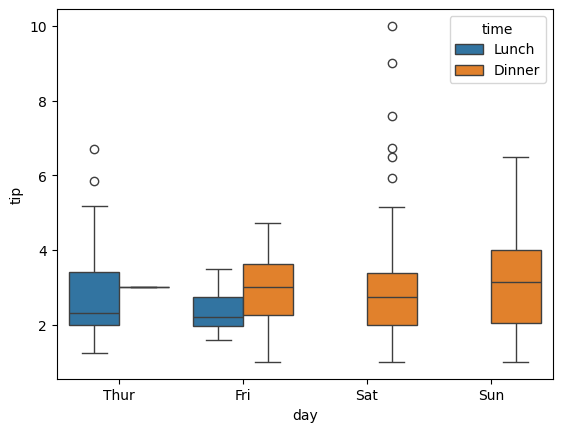

In [97]:
sns.boxplot(x='day', y='tip',  data=tips, hue='time');


### 問題

1. seabornに例題として含まれているtitanicデータを読み込み，運賃(fare）と生存確率(survived)のロジスティック回帰を，性別(sex)ごとに行え．
（ヒント：ロジスティック回帰を行うには，lmplotの引数のlogisticをTrueにする．）

2. seabornに例題として含まれているtitanicデータを読み込み，客室クラス(class）と性別(sex)ごとの生存確率(survived)を集計した結果を描画せよ．

RuntimeError: `logistic=True` requires statsmodels, an optional dependency, to be installed.

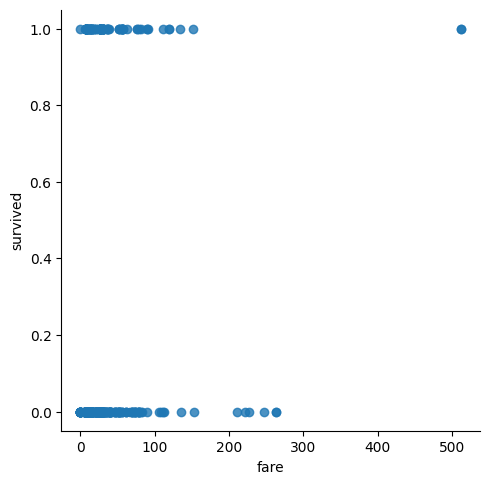

In [107]:
sns.lmplot(x='fare', y='survived', data=titanic, logistic=True, hue='sex')
plt.show()

/var/folders/09/9hrzy57n5rb428pvqftbcxwr0000gn/T/ipykernel_6929/2343578115.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = titanic.groupby(['class', 'sex'])['survived'].mean().reset_index()


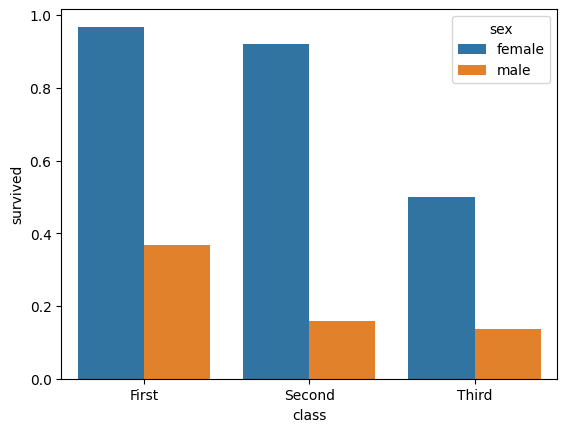

In [114]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Titanicデータを読み込みます。
titanic = sns.load_dataset('titanic')

# 客室クラスと性別ごとの生存確率を集計します。
survival_rate = titanic.groupby(['class', 'sex'])['survived'].mean().reset_index()

# 集計結果を描画します。
sns.barplot(x='class', y='survived', hue='sex', data=survival_rate)

plt.show()